<a href="https://colab.research.google.com/github/jay-madane/ML_clg_labs/blob/main/ml_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning 4
##Comparison Analysis of all Supervised Learning Algorithms

####Name: Jay Kiran Madane
####PRN: RBT21CB036
####Title: Identifying the Best Machine Learning Model for finding out any structure in Ionosphere.
####Aim: To train and evaluate a variety of machine learning models on a given dataset, in order to identify the best model for a given task or optimize the hyperparameters of a model.
####Dataset: Ionosphere


#### Code:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Loading the dataset

In [ ]:
ionosphere = fetch_openml(name='ionosphere', version=1, as_frame=True)
df = ionosphere.frame

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### Exploratory Data Analysis

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   a01     351 non-null    float64 
 1   a02     351 non-null    float64 
 2   a03     351 non-null    float64 
 3   a04     351 non-null    float64 
 4   a05     351 non-null    float64 
 5   a06     351 non-null    float64 
 6   a07     351 non-null    float64 
 7   a08     351 non-null    float64 
 8   a09     351 non-null    float64 
 9   a10     351 non-null    float64 
 10  a11     351 non-null    float64 
 11  a12     351 non-null    float64 
 12  a13     351 non-null    float64 
 13  a14     351 non-null    float64 
 14  a15     351 non-null    float64 
 15  a16     351 non-null    float64 
 16  a17     351 non-null    float64 
 17  a18     351 non-null    float64 
 18  a19     351 non-null    float64 
 19  a20     351 non-null    float64 
 20  a21     351 non-null    float64 
 21  a22     351 non-

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   a01  a02      a03      a04      a05      a06      a07      a08      a09  \
0  1.0  0.0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1  1.0  0.0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2  1.0  0.0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3  1.0  0.0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4  1.0  0.0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

       a10  ...      a26      a27      a28      a29      a30      a31  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

       a32      a33      a34  class  
0 -0.54487  0.18641 -0.45300      g  
1 -0.06288 -0.13

In [ ]:
# Check for missing values
print("Missing values:", df.isnull().sum().sum())

Missing values: 0


#### Visualization of the Dataset

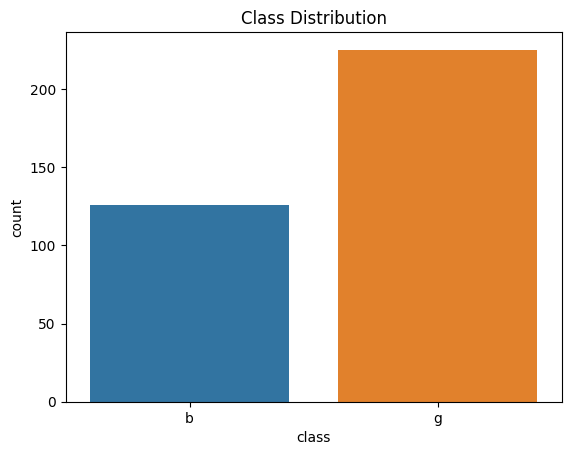

In [ ]:
# Visualize the distribution of classes
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

#### Splitting Dataset into training and testing sets

In [ ]:
# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardize the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Evaluate models and store the results

In [ ]:
results = {}

def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

#### Comparing different algorithms

In [ ]:
svm_model = SVC(random_state=42)
evaluate_model(svm_model, 'SVM')


SVM Accuracy: 94.37%
Confusion Matrix:
 [[24  4]
 [ 0 43]]
Classification Report:
               precision    recall  f1-score   support

           b       1.00      0.86      0.92        28
           g       0.91      1.00      0.96        43

    accuracy                           0.94        71
   macro avg       0.96      0.93      0.94        71
weighted avg       0.95      0.94      0.94        71



In [ ]:
nb_model = GaussianNB()
evaluate_model(nb_model, 'Naive Bayes')


Naive Bayes Accuracy: 88.73%
Confusion Matrix:
 [[20  8]
 [ 0 43]]
Classification Report:
               precision    recall  f1-score   support

           b       1.00      0.71      0.83        28
           g       0.84      1.00      0.91        43

    accuracy                           0.89        71
   macro avg       0.92      0.86      0.87        71
weighted avg       0.90      0.89      0.88        71



In [ ]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, 'KNN')



KNN Accuracy: 84.51%
Confusion Matrix:
 [[17 11]
 [ 0 43]]
Classification Report:
               precision    recall  f1-score   support

           b       1.00      0.61      0.76        28
           g       0.80      1.00      0.89        43

    accuracy                           0.85        71
   macro avg       0.90      0.80      0.82        71
weighted avg       0.88      0.85      0.83        71



In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, 'Decision Tree')


Decision Tree Accuracy: 88.73%
Confusion Matrix:
 [[21  7]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           b       0.95      0.75      0.84        28
           g       0.86      0.98      0.91        43

    accuracy                           0.89        71
   macro avg       0.91      0.86      0.88        71
weighted avg       0.90      0.89      0.88        71



In [ ]:
lr_model = LogisticRegression(random_state=42)
evaluate_model(lr_model, 'Logistic Regression')


Logistic Regression Accuracy: 85.92%
Confusion Matrix:
 [[18 10]
 [ 0 43]]
Classification Report:
               precision    recall  f1-score   support

           b       1.00      0.64      0.78        28
           g       0.81      1.00      0.90        43

    accuracy                           0.86        71
   macro avg       0.91      0.82      0.84        71
weighted avg       0.89      0.86      0.85        71



In [ ]:
ann_model = MLPClassifier(random_state=42)
evaluate_model(ann_model, 'Artificial Neural Network')


Artificial Neural Network Accuracy: 90.14%
Confusion Matrix:
 [[21  7]
 [ 0 43]]
Classification Report:
               precision    recall  f1-score   support

           b       1.00      0.75      0.86        28
           g       0.86      1.00      0.92        43

    accuracy                           0.90        71
   macro avg       0.93      0.88      0.89        71
weighted avg       0.92      0.90      0.90        71



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Displaying overall results

In [ ]:
print("\nOverall Results:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy * 100:.2f}%")


Overall Results:
SVM: 94.37%
Naive Bayes: 88.73%
KNN: 84.51%
Decision Tree: 88.73%
Logistic Regression: 85.92%
Artificial Neural Network: 90.14%


**Conclusion**

Finally after doing Data cleaning and Data Preprocessing (cleaning data, train_test_split model and machine learning model) we got the accuracy scores and we can say that SVM Classification gives the best accuracy among all machine learning models.